In [1]:
import numpy as np 
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
folder_path = '/content/drive/MyDrive/dataset'
os.chdir(folder_path)

In [ ]:
import os
folder_contents = os.listdir(folder_path)
print(folder_contents)

['test', 'train', 'Validation']


In [4]:
from PIL import Image
import shutil
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import glob

train_nospill_img_list = glob.glob("/content/drive/MyDrive/dataset/train/NonOilSpill/*")
train_spill_img_list = glob.glob("/content/drive/MyDrive/dataset/train/OilSpill/*")
test_nospill_img_list = glob.glob("/content/drive/MyDrive/dataset/test/NonOilSpill/*")
test_spill_img_list = glob.glob("/content/drive/MyDrive/dataset/test/OilSpill/*")

print(f"Number of No Spill images in train dataset: {len(train_nospill_img_list)}")
print(f"Number of Spill images in train dataset: {len(train_spill_img_list)}")
print(f"Number of No Spill images in test dataset: {len(test_nospill_img_list)}")
print(f"Number of Spill images in test dataset: {len(test_spill_img_list)}")


Number of No Spill images in train dataset: 0
Number of Spill images in train dataset: 0
Number of No Spill images in test dataset: 0
Number of Spill images in test dataset: 0


In [7]:
import os

train_no_spill_dir = '/content/drive/MyDrive/dataset/train/Non Oil Spill'

train_no_spill_count = len([f for f in os.listdir(train_no_spill_dir) if os.path.isfile(os.path.join(train_no_spill_dir, f))])

print("Number of No Spill images in train dataset:", train_no_spill_count)


Number of No Spill images in train dataset: 1400


In [8]:
import os

train_spill_dir = '/content/drive/MyDrive/dataset/train/Oil Spill'

train_spill_count = len([f for f in os.listdir(train_spill_dir) if os.path.isfile(os.path.join(train_spill_dir, f))])

print("Number of Spill images in train dataset:", train_spill_count)


Number of Spill images in train dataset: 1400


In [9]:
import os

test_no_spill_dir = '/content/drive/MyDrive/dataset/test/Non Oil Spill'

test_no_spill_count = len([f for f in os.listdir(test_no_spill_dir) if os.path.isfile(os.path.join(test_no_spill_dir, f))])

print("Number of No Spill images in test dataset:", test_no_spill_count)


Number of No Spill images in test dataset: 300


In [10]:
import os

test_spill_dir = '/content/drive/MyDrive/dataset/test/Oil Spill'

test_spill_count = len([f for f in os.listdir(test_spill_dir) if os.path.isfile(os.path.join(test_spill_dir, f))])

print("Number of Spill images in test dataset:", test_spill_count)

Number of Spill images in test dataset: 300


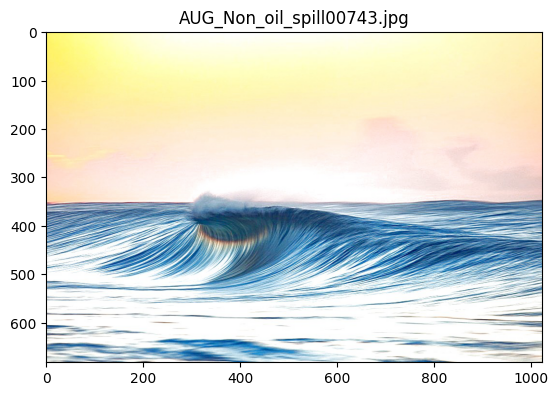

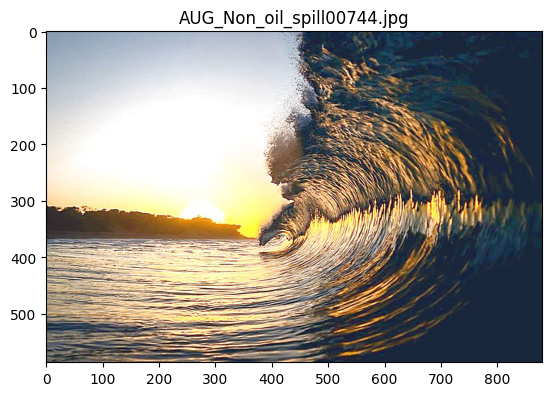

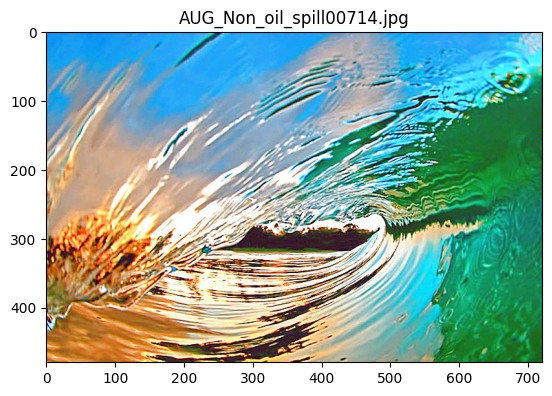

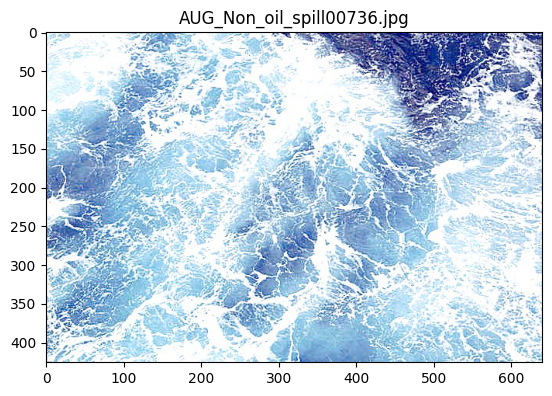

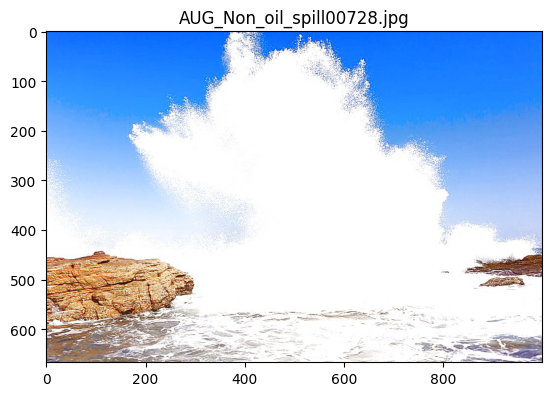

In [12]:
i=0
for oilspill_train_file in os.listdir(f"/content/drive/MyDrive/dataset/train/Non Oil Spill"):
    img = Image.open(f"/content/drive/MyDrive/dataset/train/Non Oil Spill/{oilspill_train_file}")
    plt.imshow(img)
    plt.title(oilspill_train_file)
    plt.show()
    i+=1
    if i==5:
        break

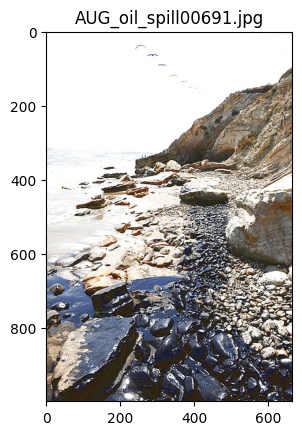

1


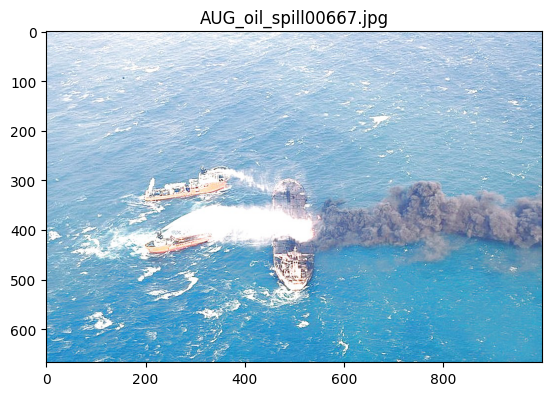

2


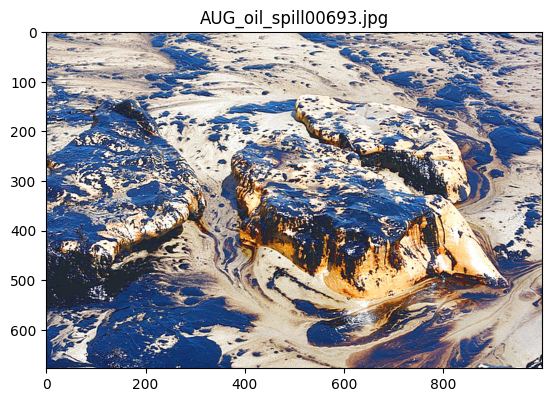

3


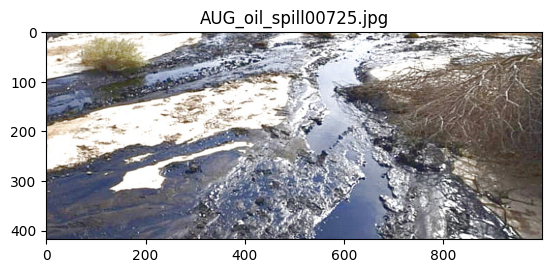

4


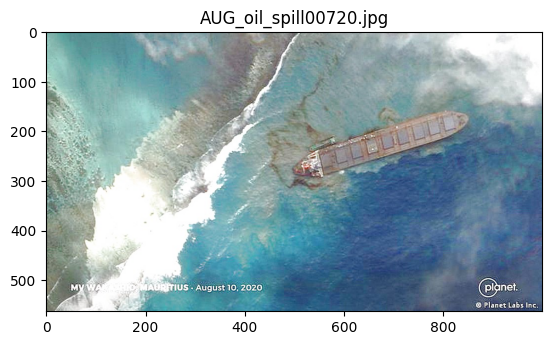

5


In [13]:
i=0
for nospill_train_file in os.listdir(f"/content/drive/MyDrive/dataset/train/Oil Spill"):
    img = Image.open(f"/content/drive/MyDrive/dataset/train/Oil Spill/{nospill_train_file}")
    plt.imshow(img)
    plt.title(nospill_train_file)
    plt.show()
    i+=1
    print(i)
    if i==5:
        break

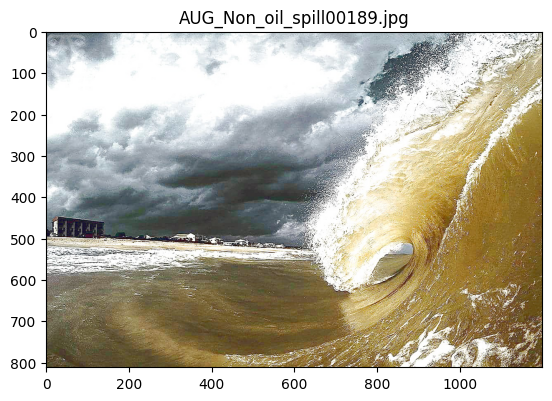

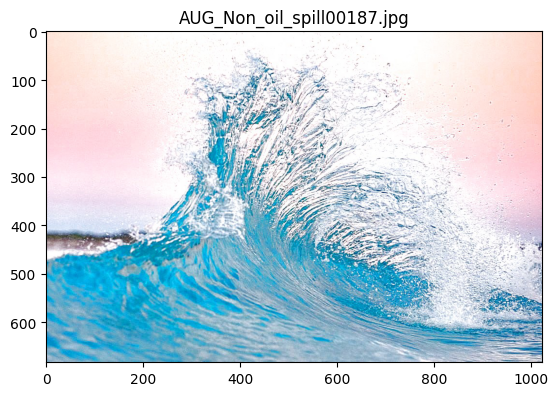

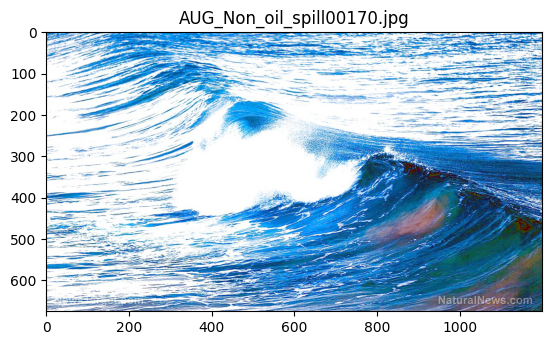

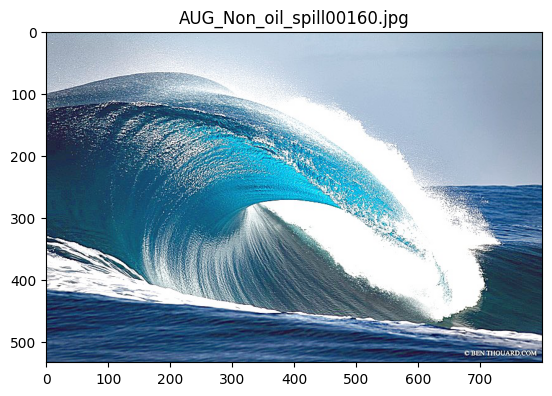

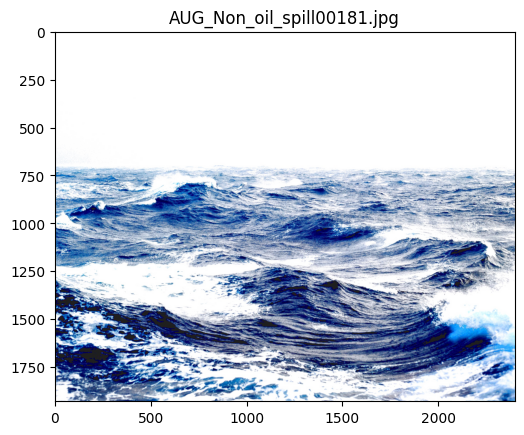

In [14]:
i=0
for spill_test_file in os.listdir("/content/drive/MyDrive/dataset/test/Non Oil Spill"):
    img = Image.open(f"/content/drive/MyDrive/dataset/test/Non Oil Spill/{spill_test_file}")
    plt.imshow(img)
    plt.title(spill_test_file)
    plt.show()
    i+=1
    if i==5:
        break

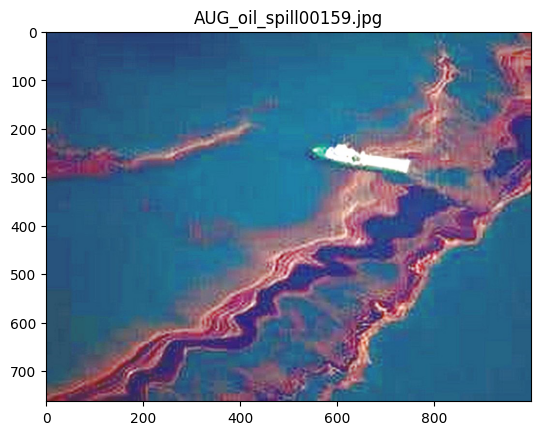

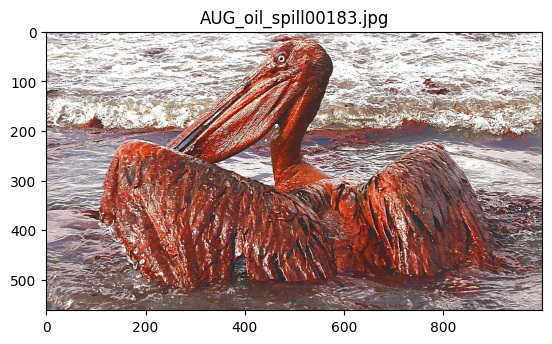

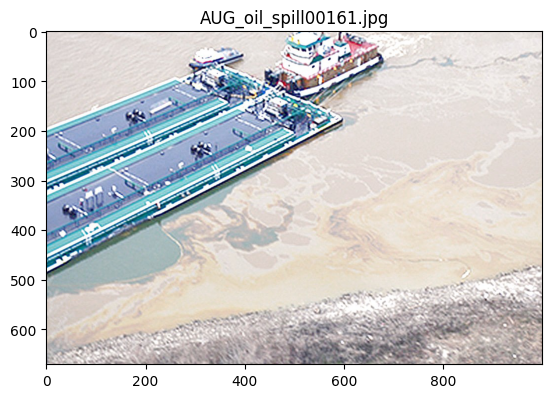

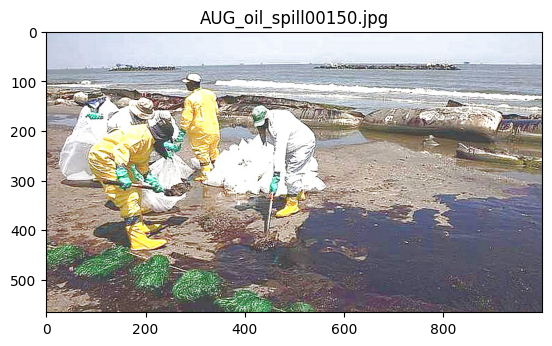

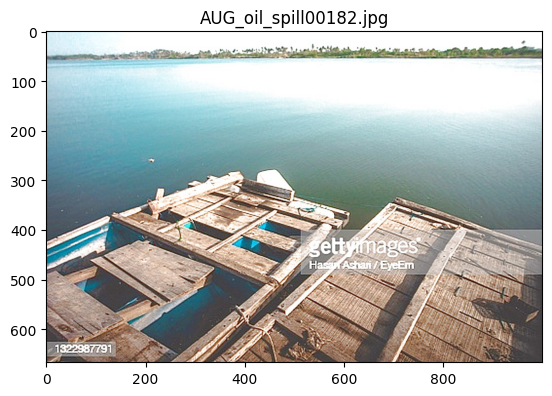

In [15]:
i=0
for nospill_test_file in os.listdir("/content/drive/MyDrive/dataset/test/Oil Spill"):
    img = Image.open(f"/content/drive/MyDrive/dataset/test/Oil Spill/{nospill_test_file}")
    plt.imshow(img)
    plt.title(nospill_test_file)
    plt.show()
    i+=1
    if i==5:
        break

In [16]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/dataset/train",
    target_size=(150,150),
    class_mode="binary"
)

Found 2800 images belonging to 2 classes.


In [18]:
validation_generator = validation_datagen.flow_from_directory(
    "/content/drive/MyDrive/dataset/test",
    target_size=(150,150),
    class_mode="binary"
)

Found 600 images belonging to 2 classes.


In [19]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs={}):
    if(logs.get('accuracy')>=0.95):
      print("\nReached 95% accuracy so cancelling training1")
      self.model.stop_training=True
callbacks = myCallback()

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = "relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 50,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[callbacks]
)

Epoch 1/50
8/8 [==============================] - 46s 6s/step - loss: 1.4087 - accuracy: 0.4805 - val_loss: 0.6989 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 48s 6s/step - loss: 0.7017 - accuracy: 0.5547 - val_loss: 0.6707 - val_accuracy: 0.7233
Epoch 3/50
8/8 [==============================] - 48s 6s/step - loss: 0.6819 - accuracy: 0.5742 - val_loss: 0.6443 - val_accuracy: 0.5650
Epoch 4/50
8/8 [==============================] - 40s 5s/step - loss: 0.6529 - accuracy: 0.6484 - val_loss: 0.6100 - val_accuracy: 0.7367
Epoch 5/50
8/8 [==============================] - 39s 5s/step - loss: 0.5933 - accuracy: 0.6367 - val_loss: 0.5933 - val_accuracy: 0.6900
Epoch 6/50
8/8 [==============================] - 37s 5s/step - loss: 0.5654 - accuracy: 0.7266 - val_loss: 0.5343 - val_accuracy: 0.7667
Epoch 7/50
8/8 [==============================] - 34s 5s/step - loss: 0.4966 - accuracy: 0.8125 - val_loss: 0.5334 - val_accuracy: 0.7283
Epoch 8/50
8/8 [==================

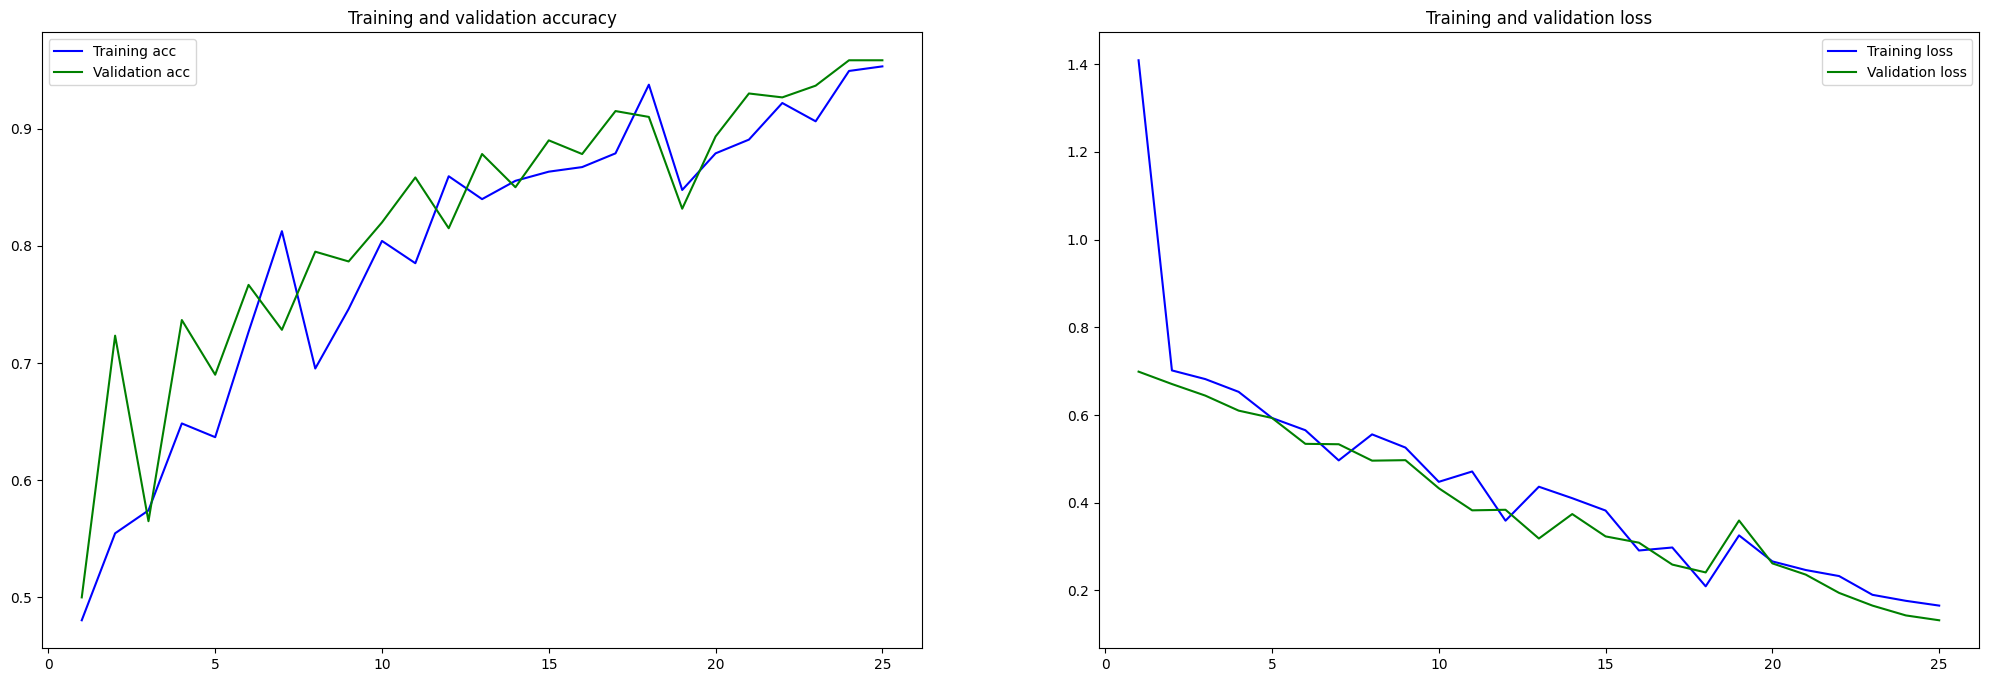

In [22]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

fig = plt.figure(figsize=(25,8))
ax1 = fig.add_subplot(121)
ax1.plot(epochs, acc, "b-", label="Training acc")
ax1.plot(epochs, val_acc, "g-", label="Validation acc")
ax1.set_title("Training and validation accuracy")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(epochs, loss, "b-", label="Training loss")
ax2.plot(epochs, val_loss, "g-", label="Validation loss")
ax2.set_title("Training and validation loss")
ax2.legend()

